<a href="https://colab.research.google.com/github/THANHDAT202/AI_24_02/blob/main/AI24_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=52447b13ff0a97d29645b7de58ff7abae40f3538e0b41a56d87d94909d640b94
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


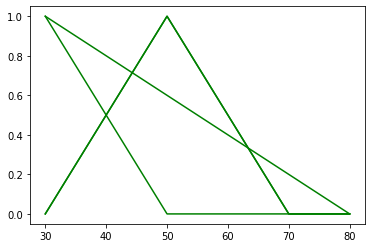

In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(30,81,1)
slow = fuzz.trimf(x,[30,30,50])
medium = fuzz.trimf(x,[30,30,80])
full_speed = fuzz.trimf(x,[30,50,70])
medium_fast = fuzz.trimf(x,[30,50,70])
plt.figure()

plt.plot(x,slow,color ='green',linewidth=1.5, label='slow')
plt.plot(x,medium,color ='green',linewidth=1.5, label='slow')
plt.plot(x,full_speed,color ='green',linewidth=1.5, label='slow')
plt.plot(x,medium_fast,color ='green',linewidth=1.5, label='slow')



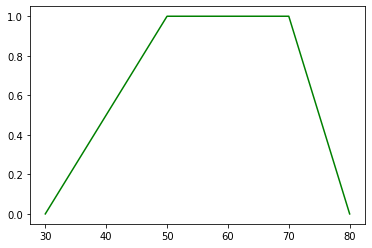

In [4]:
#vẽ hình bình hành
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(30,81,1)
slow = fuzz.trapmf(x,[30,50,70,80])
medium = fuzz.trimf(x,[30,30,80])
full_speed = fuzz.trimf(x,[30,50,70])
medium_fast = fuzz.trimf(x,[30,50,70])
plt.figure()

plt.plot(x,slow,color ='green',linewidth=1.5, label='slow')
#plt.plot(x,medium,color ='green',linewidth=1.5, label='slow')
#plt.plot(x,full_speed,color ='green',linewidth=1.5, label='slow')
#plt.plot(x,medium_fast,color ='green',linewidth=1.5, label='slow')

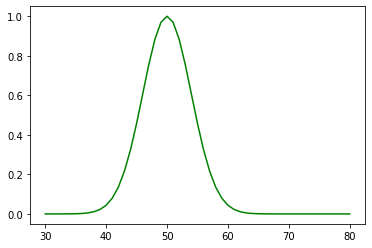

In [5]:
#vẽ hình pẩbol
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(30,81,1)
slow = fuzz.gaussmf(x,50,4)    #gaussmf vẽ hình parabol
medium = fuzz.trimf(x,[30,30,80])
full_speed = fuzz.trimf(x,[30,50,70])
medium_fast = fuzz.trimf(x,[30,50,70])
plt.figure()

plt.plot(x,slow,color ='green',linewidth=1.5, label='slow')

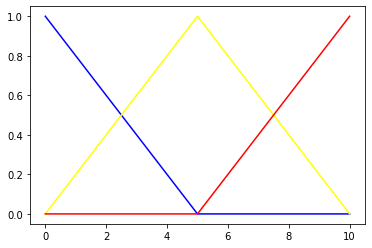

In [16]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(0,11,1)
slow = fuzz.trimf(x,[0,0,5])
medium = fuzz.trimf(x,[0,5,10])
full_speed = fuzz.trimf(x,[5,10,10])
plt.figure()

plt.plot(x,slow,color ='blue',linewidth=1.5, label='slow')
plt.plot(x,medium,color ='yellow',linewidth=1.5, label='slow')
plt.plot(x,full_speed,color ='red',linewidth=1.5, label='slow')
#plt.plot(x,medium_fast,color ='green',linewidth=1.5, label='slow')


22.967741935483872


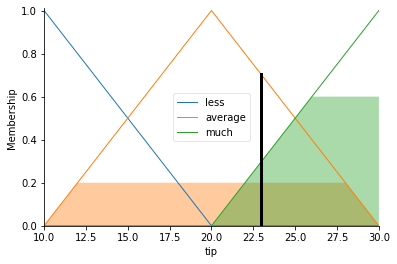

In [15]:
from skfuzzy.control.controlsystem import ControlSystemSimulation
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])
service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])
tip['less']= fuzz.trimf(tip.universe,[10,10,20])
tip['average']= fuzz.trimf(tip.universe,[10,20,30])
tip['much']= fuzz.trimf(tip.universe,[20,30,30])

rule1=ctrl.Rule(food['poor'] & service['poor'],tip['less'])
rule2=ctrl.Rule(food['poor'] & service['average'],tip['less'])
rule3=ctrl.Rule(food['poor'] & service['good'],tip['average'])
rule4=ctrl.Rule(food['average'] & service['poor'],tip['less'])
rule5=ctrl.Rule(food['average'] & service['average'],tip['average'])
rule6=ctrl.Rule(food['average'] & service['good'],tip['much'])
rule7=ctrl.Rule(food['good'] & service['poor'],tip['average'])
rule8=ctrl.Rule(food['good'] & service['average'],tip['much'])
rule9=ctrl.Rule(food['good'] & service['good'],tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=8.0
tipping.input['service']=9.0
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)

85.00000000000003


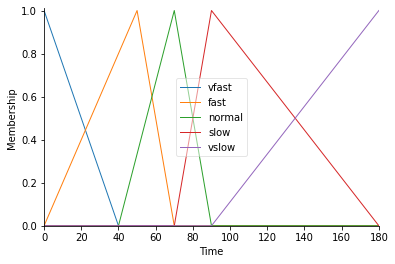

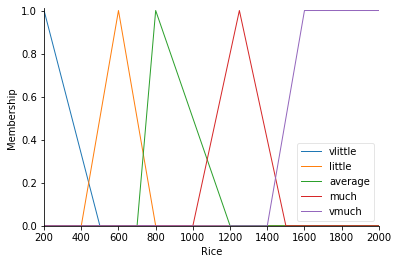

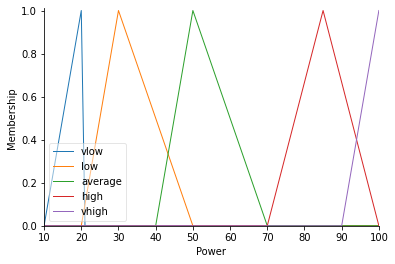

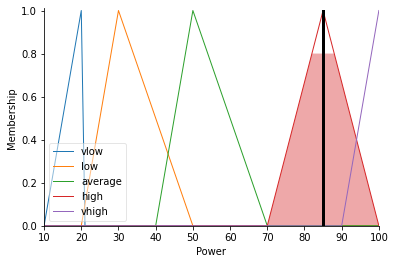

In [8]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(0,181,1),'Time')
rice = ctrl.Antecedent(np.arange(200,2001,1),'Rice')
power = ctrl.Consequent(np.arange(10,101,1),'Power')

time['vfast']= fuzz.trimf(time.universe,[0,0,40])
time['fast'] = fuzz.trimf(time.universe, [0,50,70])
time['normal']= fuzz.trimf(time.universe, [40,70,90])
time['slow']= fuzz.trimf(time.universe, [70,90,180])
time['vslow']= fuzz.trimf(time.universe, [90,180,180])

rice['vlittle']= fuzz.trimf(rice.universe,[200,200,500])
rice['little'] = fuzz.trimf(rice.universe, [400,600,800])
rice['average']= fuzz.trimf(rice.universe, [700,800,1200])
rice['much']= fuzz.trimf(rice.universe, [1000,1250,1500])
rice['vmuch']= fuzz.trapmf(rice.universe,[1400,1600,2000,2000])

power['vlow'] = fuzz.trimf(power.universe, [10,20,20])
power['low'] = fuzz.trimf(power.universe,[20,30,50])
power['average'] = fuzz.trimf(power.universe,[40,50,70])
power['high'] = fuzz.trimf(power.universe,[70,85,100])
power['vhigh'] = fuzz.trapmf(power.universe,[90,100,100,100])
time.view()
rice.view()
power.view()

rule1 = ctrl.Rule(time['vfast'] & rice['vlittle'], power['high'])
rule2 = ctrl.Rule(time['vfast'] & rice['little'], power['high'])
rule3 = ctrl.Rule(time['vfast'] & rice['average'], power['vhigh'])
rule4 = ctrl.Rule(time['vfast'] & rice['much'], power['vhigh'])
rule5 = ctrl.Rule(time['vfast'] & rice['vmuch'], power['vhigh'])

rule6 = ctrl.Rule(time['fast'] & rice['vlittle'], power['high'])
rule7 = ctrl.Rule(time['fast'] & rice['little'], power['high'])
rule8 = ctrl.Rule(time['fast'] & rice['average'], power['high'])
rule9 = ctrl.Rule(time['fast'] & rice['much'], power['vhigh'])
rule10 = ctrl.Rule(time['fast'] & rice['vmuch'],power['vhigh'])

rule11 = ctrl.Rule(time['normal'] & rice['vlittle'], power['vlow'])
rule12 = ctrl.Rule(time['normal'] & rice['little'], power['low'])
rule13 = ctrl.Rule(time['normal'] & rice['average'], power['average'])
rule14 = ctrl.Rule(time['normal'] & rice['much'], power['high'])
rule15 = ctrl.Rule(time['normal'] & rice['vmuch'], power['vhigh'])
                   
rule16 = ctrl.Rule(time['slow'] & rice['vlittle'], power['low'])
rule17 = ctrl.Rule(time['slow'] & rice['little'], power['low'])
rule18 = ctrl.Rule(time['slow'] & rice['average'], power['vlow'])
rule19 = ctrl.Rule(time['slow'] & rice['much'], power['vlow'])
rule20 = ctrl.Rule(time['slow'] & rice['vmuch'], power['vlow'])

rule21 = ctrl.Rule(time['vslow'] & rice['vlittle'], power['vlow'])
rule22 = ctrl.Rule(time['vslow'] & rice['little'], power['vlow'])
rule23 = ctrl.Rule(time['vslow'] & rice['average'], power['vlow'])
rule24 = ctrl.Rule(time['vslow'] & rice['much'], power['vlow'])
rule25 = ctrl.Rule(time['vslow'] & rice['vmuch'], power['vlow'])

cpower_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
cpower = ctrl.ControlSystemSimulation(cpower_ctrl)
cpower.input['Time'] = 70
cpower.input['Rice'] = 1200
cpower.compute()
print(cpower.output['Power'])
power.view(sim = cpower)